In [7]:
!pip install pycaret
!pip install python-dotenv
!pip install ydata-profiling
!pip install shap



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.0
    Uninstalling seaborn-0.13.0:
      Successfully uninstalled seaborn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the pack

<h3>1. Introduction </h3>
This template notebook will give users (data scientists and data engineers) the opportunities to train and deploy regression machine learning models with ease, without having to write all of the code from scratch. <br> 
There are a few requirements for the user anyway, such as;
<li>the data location</li> 
<li>algorithm_choice: what type of machine learning model you are trying to build. Regression, classification, time series etc.</li>
<li>the target (dependent) variable in your dataset and</li>
<li>endpoint_name: what you will like to call your endpoint after it is created</li>
<li>model_name: what you will like to call your model</li>
<li>data_location: the location of the datasets. Needs to be in an S3 bucket.</li>
<li>pycaret_ecr_name: what you have named the ecr image that you created </li>
<li>instance_type: the details of the instance type that you will be creating. </li>

<b>All of these values will be entered in terraform and will be automatically applied in the notebook.</b>

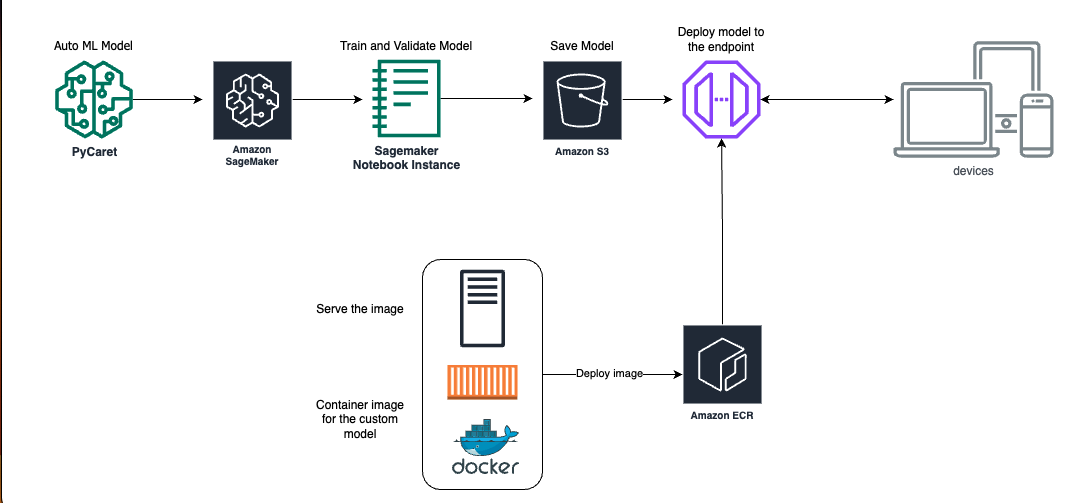

<h3>2. Imports</h3>

The libraries that are required for this model notebook are imported below 

In [3]:
import os
from sagemaker import get_execution_role
from dotenv import load_dotenv
from load_data import load_data
from transform_data import split_data, preprocess_df, get_feature_importances
import importlib
from save_model_to_s3 import save_model_to_s3
from deploy_model_endpoint import deploy_model
from finalize_and_save_model import finalize_and_save_model
from delete_sagemaker_endpoint import delete_sagemaker_endpoint
from ydata_profiling import ProfileReport
import shap
import pandas as pd
import matplotlib.pyplot as plt

<h3>3. Loading Data</h3>
Here the user is required to specify the location of the data that they will like to use for prediction. An helper function is used to load the data from S3. 

<em>Note: Your data needs to be an s3 bucket.</em>

In [22]:
# Variables Setup Stage
load_dotenv(".env")
role = get_execution_role()

# Env variables
data_location_s3 = os.getenv("data_location_s3")
algorithm_choice = os.getenv("algorithm_choice")
target = os.getenv("target")
endpoint_name = os.getenv("endpoint_name")
model_name = os.getenv("model_name")
model_s3_bucket = os.getenv("model_s3_bucket")
data_location = 's3://{}'.format(data_location_s3)
instance_type = os.getenv("inference_instance_type")
inference_instance_count = int(os.getenv("inference_instance_count"))
image_uri = os.getenv("ecr_repo_uri")
tuning_metric = os.getenv("tuning_metric")
preprocessing_script_path = os.getenv("preprocessing_script_path")

print(data_location_s3, algorithm_choice, target, endpoint_name, model_name, data_location, instance_type, image_uri, tuning_metric)

None None None None None s3://None None None None


<h3>4. Read and display a sample of data</h3>

In [5]:
# Load data from S3
df = load_data(data_location)
df.head()


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h3>5. Data Exploration</h3>

In [24]:
profile = ProfileReport(
    df,
    sort=None,
    html={"style": {"full_width": True}},
    title="Data Exploration",
    explorative=True,
)
profile.to_widgets()


NameError: name 'ProfileReport' is not defined

<h3>6. Data Cleaning and Feature Engineering Placeholder</h3> 

In [5]:
df=preprocess_df(df,preprocessing_script_path)

NameError: name 'df' is not defined

In [ ]:
df.head()

<h3> Feature selection </h3>

In [ ]:
# Get feature importance dataframe
feature_importance = get_feature_importances(df, target, algorithm_choice)

In [ ]:
#TODO Please wrap the code below to be included within the get_feature_importance()
# Visualise the feature importances and which features will be kept and discarded

""" Set this value to a number between 0-1 if you want to set custom threshold. """
custom_threshold = None

if custom_threshold == None:
    """ By default keep all features within 1 standard deviation from most important feature. """
    std = feature_importance['importance'].std()
    max_importance = feature_importance['importance'].max()
    threshold = max_importance - std
else:
    threshold = custom_threshold

print('\n\nFeature importances:')
print(feature_importance)
print('\n')

important_features = feature_importance[feature_importance['importance'] > threshold].index.tolist()
discarded_features = feature_importance[feature_importance['importance'] <= threshold].index.tolist()

# Plot feature importances
plt.bar(important_features, feature_importance.loc[important_features, 'importance'], color='darkblue', label='Kept Features')
plt.bar(discarded_features, feature_importance.loc[discarded_features, 'importance'], color='grey', label='Discarded Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Feature Importances')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
#TODO Please wrap the code below to be included within the get_feature_importance(). We want to be able to just run get_feature_importance(df, target, algorithm_choice) and get the dataframe that contains only predictive features
# Once you're happy with which features will be discarded, run this to only keep the important features
print(f"Keeping features: {important_features}\n")
print(f"Discarding features: {discarded_features}\n")

df = df[important_features + [target]]

In [ ]:
# Split and shuffle data
train_data, test_data = split_data(df, shuffle=True)
print(train_data, test_data)

In [ ]:
# Import Pycaret library depending on the algorithm choice
pycaret = importlib.import_module(f"pycaret.{algorithm_choice}")


In [ ]:
# Initialize data in PyCaret with all the defined parameters
pycaret.setup(data=train_data, target=target, session_id=123)


<h3>7.Model Training</h3>

Here we are using the pycaret automl tool to train the model. The automl tool tries a number of machine learning algorithms depending on the type of machine learning problem you are trying to solve <br>
(regression, classification or time series). The automl tool then selects the best model based on the accuracy metrics of the tried models. 

In [ ]:
# Train and evaluate the performance of all estimators available in the model library using cross-validation.
bestModel = pycaret.compare_models()


<h3>7.5. Hyperparameter Tuning: </h3>

Here we optimize the model using hyperparameter tuning. This can be done by using pycaret automatic hyperparameter tuning function, or choosing the metric user want to focus on optimizing eg. MAE, RMSE for regression, and Accuracy, AUC for classification. User can also specify how many iteration user want to run (default is 10 iterations).

This can be done by using these commands
```
pycaret.tune_model(model)
pycaret.tune_model(model, n_iter = <number of iteration>)
pycaret.tune_model(model, optimize = '<Metric>')
```

In the case where original model has a better performance, pycaret will return the original model


In [ ]:
bestModel = pycaret.tune_model(bestModel, n_iter = 10, optimize = tuning_metric)


In [ ]:
# View the model's hyperparameter
print(bestModel)


<h3>8. Model Evaluation: </h3>

Here we evaluate the performance of the best model, getting some visual representation of hyperparameters, features and other important details about the selected model.


In [ ]:
# Evaluate model: Display UI analyzing Hyperparameters, Confusion Matrix, Class Report, etc.
pycaret.evaluate_model(bestModel)

<h3>9. Saving Model for future predition</h3>

Here we are using a function that saves the model to s3. 

In [ ]:
# Finalising model and save the model to current directory
final_model = finalize_and_save_model(algorithm_choice, bestModel, model_name)


In [ ]:
final_prediction = pycaret.predict_model(final_model, data=test_data)
final_prediction.head()


# Upload model to s3

In [ ]:
save_model_to_s3(model_name, model_s3_bucket)

<h3>Model explainability functions:</h3>

This visualization is designed to explain the output of a single prediction by showing the contribution of each feature to the final prediction, compared to a base value.


<li><b>Base Value:</b> The base value is the reference point for the model's predictions. It's the value that would be predicted if we didn't know any features for the current output. In SHAP, this is typically the mean prediction of the model over the training dataset.</li>
<li><b>Output Value (f(x)):</b> This is the actual prediction for the instance being explained. This value is the sum of the base value and all of the SHAP values (feature contributions) for this prediction.</li>
<li><b>Red and Blue Arrows:</b> Each arrow represents a feature that contributes to the prediction. Features pushing the prediction higher (toward the right) are shown in red, and those pushing the prediction lower (toward the left) are shown in blue. The length of each arrow represents the magnitude of the feature's contribution.</li>
<li><b>Red:</b> The feature increases the model's prediction. Pushes the prediction to a higher value, indicating that this feature has a positive impact on the prediction.</li>
<li><b>Blue:</b> If there were any, blue would indicate features that push the model's prediction to a lower value.</li>

### Shap Summary Plot
We will use summary_plot. This type of plot aggregates SHAP values for all the features and all samples in the selected set. Then SHAP values are sorted, so the first one shown is the most important feature. In addition to that, we are provided with information of how each feature affects the model output.

In [ ]:
test_features = test_data.copy().drop(target, axis=1)

explainer = shap.Explainer(final_model.predict, test_features)

# Generate SHAP values for your test features
shap_values = explainer(test_features)

base_value = shap_values.base_values[0]  # This is for a single output model

shap_values_array = shap_values.values
# Visualize the first prediction's explanation
shap.initjs()

# Plotting the summary plot for all features across all test samples
shap.summary_plot(shap_values_array, test_features)


In [ ]:
shap_values_array = shap_values.values[0]

shap.force_plot(base_value, shap_values_array, test_features.iloc[0])


<h3>10. Deploying the model endpoints</h3> 

Here we use a function that creates the model endpoint in sagemaker. 

In [ ]:
# deploy model to sagemaker endpoint
deploy_model(model_name, algorithm_choice, model_s3_bucket, instance_type, endpoint_name, role, inference_instance_count, image_uri)


# Clean up stage
## Remove Endpoint and Endpoint Config

In [ ]:
delete_sagemaker_endpoint(endpoint_name)
